In [1]:
import librosa 
import matplotlib.pyplot as plt

In [2]:


array, sampling_rate = librosa.load(librosa.ex("trumpet"))

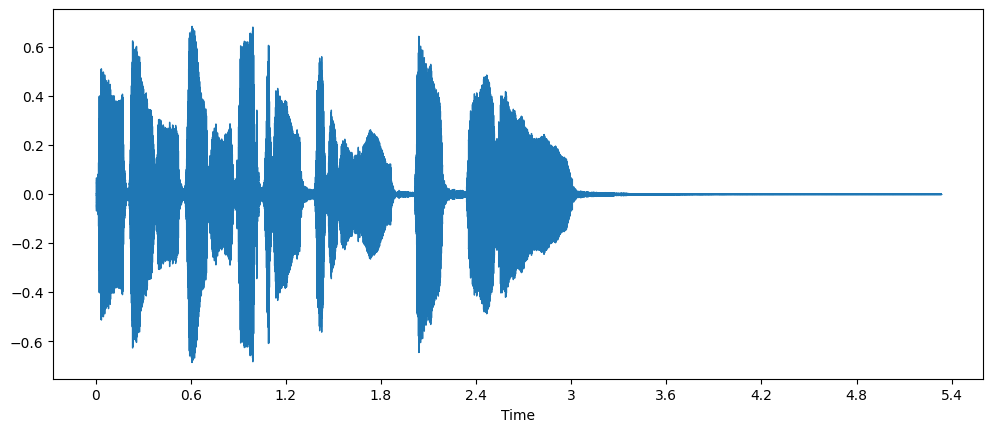

In [3]:

import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

## Audio classification

In [5]:
from datasets import load_dataset
from datasets import Audio



c:\Users\PC-022\Desktop\awarri\ai-project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# download dataset and load the train split
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train",trust_remote_code=True)


In [17]:
minds =minds.cast_column('audio',Audio(sampling_rate=16_000))

In [18]:
exam = minds[0]
exam

{'path': 'C:\\Users\\PC-022\\.cache\\huggingface\\datasets\\downloads\\extracted\\34713ee1ef2f7574075347f90b4d8eb42bdff2eb10a0a5ad76fa22062233224b\\en-AU~PAY_BILL\\response_4.wav',
 'audio': {'path': 'C:\\Users\\PC-022\\.cache\\huggingface\\datasets\\downloads\\extracted\\34713ee1ef2f7574075347f90b4d8eb42bdff2eb10a0a5ad76fa22062233224b\\en-AU~PAY_BILL\\response_4.wav',
  'array': array([2.36120541e-05, 1.92325111e-04, 2.19284673e-04, ...,
         9.40908678e-04, 1.16613181e-03, 7.20883720e-04]),
  'sampling_rate': 16000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [10]:
tin = load_dataset("PolyAI/minds14", name="en-AU", split="train",trust_remote_code=True)


In [11]:
tin[0]

{'path': 'C:\\Users\\PC-022\\.cache\\huggingface\\datasets\\downloads\\extracted\\34713ee1ef2f7574075347f90b4d8eb42bdff2eb10a0a5ad76fa22062233224b\\en-AU~PAY_BILL\\response_4.wav',
 'audio': {'path': 'C:\\Users\\PC-022\\.cache\\huggingface\\datasets\\downloads\\extracted\\34713ee1ef2f7574075347f90b4d8eb42bdff2eb10a0a5ad76fa22062233224b\\en-AU~PAY_BILL\\response_4.wav',
  'array': array([ 0.        ,  0.00024414, -0.00024414, ..., -0.00024414,
          0.00024414,  0.0012207 ]),
  'sampling_rate': 8000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

In [14]:
from transformers import pipeline

classifier = pipeline('audio-classification', model='anton-l/xtreme_s_xlsr_300m_minds14')

c:\Users\PC-022\Desktop\awarri\ai-project\.venv\Lib\site-packages\huggingface_hub\file_download.py:159: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\PC-022\.cache\huggingface\hub\models--anton-l--xtreme_s_xlsr_300m_minds14. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of the model checkpoint at anton-l/xtreme_s_xlsr_300m_minds14 were n

In [19]:
classifier(exam['audio']['array'])

[{'score': 0.962530791759491, 'label': 'pay_bill'},
 {'score': 0.02867298014461994, 'label': 'freeze'},
 {'score': 0.0033498092088848352, 'label': 'card_issues'},
 {'score': 0.002005809685215354, 'label': 'abroad'},
 {'score': 0.0008484349236823618, 'label': 'high_value_payment'}]

In [20]:
id2label =minds.features['intent_class'].int2str

id2label(exam['intent_class'])

'pay_bill'